In [61]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 

## (a)

In [62]:
# Load the data
results = loadmat('./yalefaces.mat')
X = results['X']

# Extract the first 100 columns
X_100 = X[:, :100]

# Compute the 100x100 correlation matrix
C = np.dot(X_100.T, X_100)

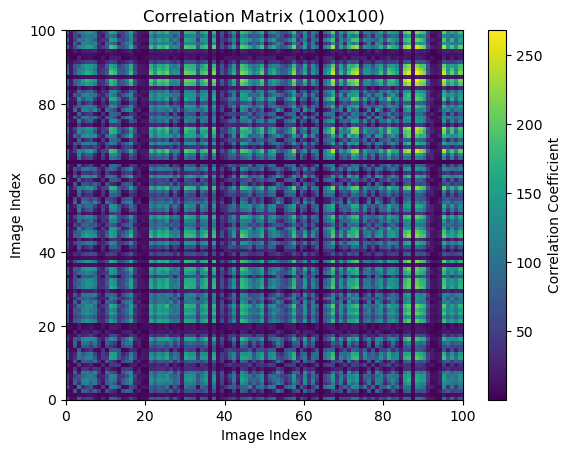

In [63]:
# Plot the correlation matrix using pcolor
plt.pcolor(C)
color_bar = plt.colorbar()
color_bar.set_label('Correlation Coefficient')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.title('Correlation Matrix (100x100)')
plt.show()

## (b)
From the correlation matrix, the images that are most highly correlated seem to be the 87th and 89th image. The images with the lowest correlation seem to be the 20th and 97th image.

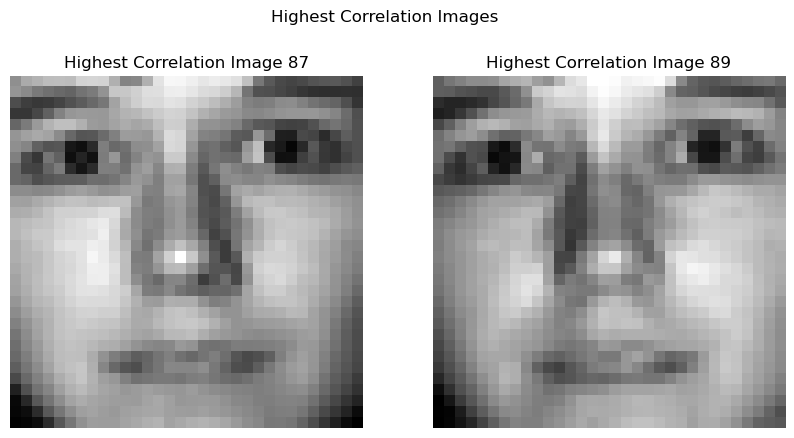

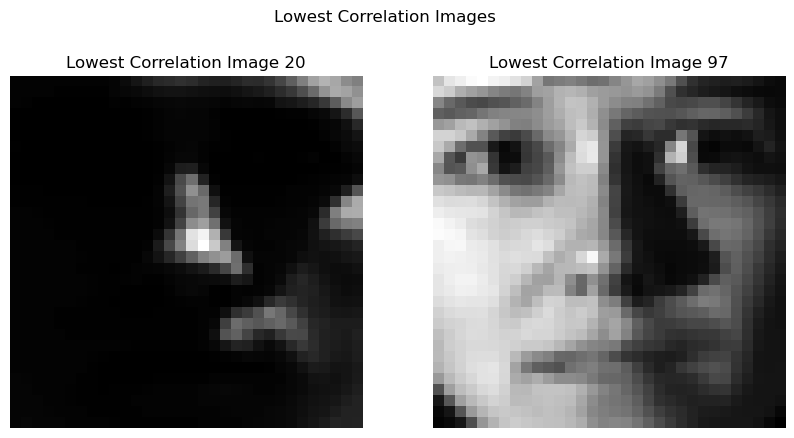

In [64]:
def plot_image(index, title):
    img = X[:, index].reshape(32, 32)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    
highest_corr = [86, 88]
lowest_corr = [19, 96]

# Plot the pairs of images
plt.figure(figsize=(10, 5))
plt.suptitle('Highest Correlation Images')

plt.subplot(1, 2, 1)
plot_image(highest_corr[0], f'Highest Correlation Image {highest_corr[0] + 1}')
plt.subplot(1, 2, 2)
plot_image(highest_corr[1], f'Highest Correlation Image {highest_corr[1] + 1}')

plt.figure(figsize=(10, 5))
plt.suptitle('Lowest Correlation Images')

plt.subplot(1, 2, 1)
plot_image(lowest_corr[0], f'Lowest Correlation Image {lowest_corr[0] + 1}')
plt.subplot(1, 2, 2)
plot_image(lowest_corr[1], f'Lowest Correlation Image {lowest_corr[1] + 1}')

plt.show()


## (c)

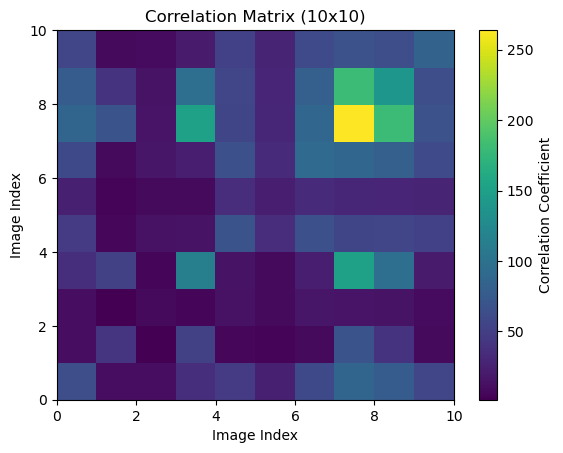

In [65]:
img_indices = [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]

# Image indices (converted to zero-indexing)
indices = [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]

# Extract the specified columns
X_selected = X[:, indices]

# Compute the 10x10 correlation matrix
C = np.dot(X_selected.T, X_selected)

# Plot the correlation matrix using pcolor
plt.pcolor(C)
color_bar = plt.colorbar()
color_bar.set_label('Correlation Coefficient')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.title('Correlation Matrix (10x10)')
plt.show()

## (d)

In [66]:
import numpy as np

# Assuming X is already defined and loaded

# Compute the matrix Y = XX^T
Y = np.dot(X, X.T)

# Compute eigenvalues and eigenvectors of Y
eigenvalues, eigenvectors = np.linalg.eigh(Y)

# Sort eigenvalues and eigenvectors by descending order of eigenvalues
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# Get the first eigenvector v1
v1 = eigenvectors[:, 0]

## (e)

In [67]:
# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Select the first six principal component directions
first_six_principal_components = Vt[:6, :]

print("First six principal component directions:")
print(first_six_principal_components)

First six principal component directions:
[[-0.01219331 -0.00215188 -0.01056679 ... -0.02177117 -0.03015309
  -0.0257889 ]
 [-0.01938848 -0.00195186  0.02471869 ...  0.04027773  0.00219562
   0.01553129]
 [ 0.01691206  0.00143586  0.0384465  ...  0.01340245 -0.01883373
   0.00643709]
 [ 0.0204079  -0.01201431  0.00397553 ... -0.01641295 -0.04011563
   0.02679029]
 [-0.01902342  0.00418948  0.0384026  ... -0.01092512  0.00087341
   0.01260435]
 [-0.0090084  -0.00624237  0.01580824 ... -0.00977639  0.00090316
   0.00304479]]


In [68]:
# Get the first SVD mode u1
u1 = U[:, 0]

# Compute the norm of the difference of the absolute values of v1 and u1
norm_diff = np.linalg.norm(np.abs(v1) - np.abs(u1))

print("Norm of the difference of absolute values of v1 and u1:")
print(norm_diff)

Norm of the difference of absolute values of v1 and u1:
1.1988821911391694e-15


The first eignenvector v_1 from (d) and the first SVD mode u_1 from (e) are very similar and have a very small norm of difference of their absolute values.

Percentage of variance captured by SVD mode 1: 72.93%
Percentage of variance captured by SVD mode 2: 15.28%
Percentage of variance captured by SVD mode 3: 2.57%
Percentage of variance captured by SVD mode 4: 1.88%
Percentage of variance captured by SVD mode 5: 0.64%
Percentage of variance captured by SVD mode 6: 0.59%


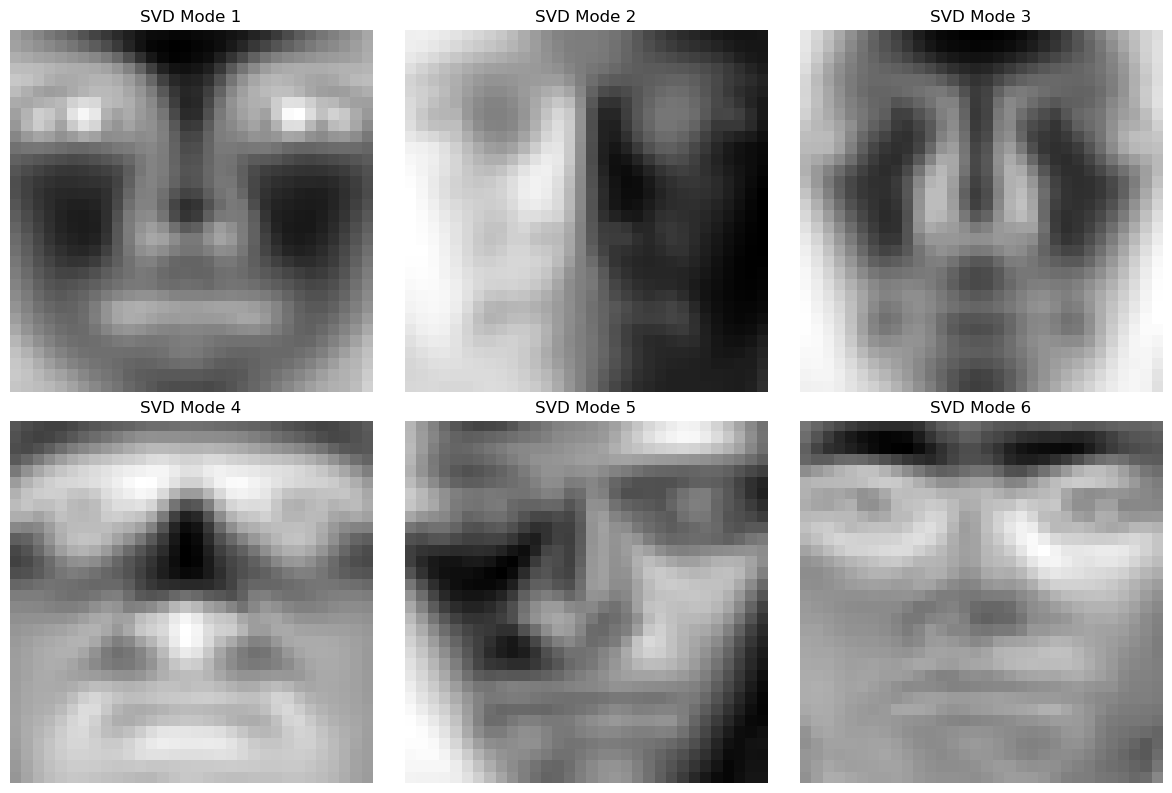

In [75]:
# Compute the percentage of variance captured by each of the first 6 SVD modes
variance_ratios = (S[:6] ** 2) / np.sum(S ** 2) * 100

# Print the variance percentages
for i, variance_ratio in enumerate(variance_ratios, 1):
    print(f"Percentage of variance captured by SVD mode {i}: {variance_ratio:.2f}%")

# Plot the first 6 SVD modes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat, start=1):
    mode_image = U[:, i - 1].reshape(32, 32)
    ax.imshow(mode_image, cmap='gray')
    ax.set_title(f"SVD Mode {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()
